In [11]:
from utils.DataManager import DataManager
from sklearn.ensemble import RandomForestClassifier
from utils.Sampling import sampling_SMOTE
from utils.CrossValidation import CrossValidation

In [2]:
data_manager = DataManager(r'C:\Users\vnaza\OneDrive\Documentos\Projetos\ClassifierCompetition\data\Train.xlsx')

In [3]:
X_train, X_test, y_train, y_test = data_manager.train_test_splits(0.7)

In [4]:
X_train_sampled, y_train_sampled = sampling_SMOTE(X_train, y_train)

In [6]:



rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
cross_validation = CrossValidation(X_train_sampled, y_train_sampled, model=rf_model, n_splits=5)

params = [{
    # 'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Split quality function
    # 'max_depth': [None, 5, 10],  # Maximum depth of each tree
    # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    # 'max_features': ['log2', 'sqrt'],  # Number of features to consider when looking for the best split
}]

best_model, best_params = cross_validation.grid_search(params=params, scoring='recall')

rf_model = RandomForestClassifier().set_params(**best_params)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)


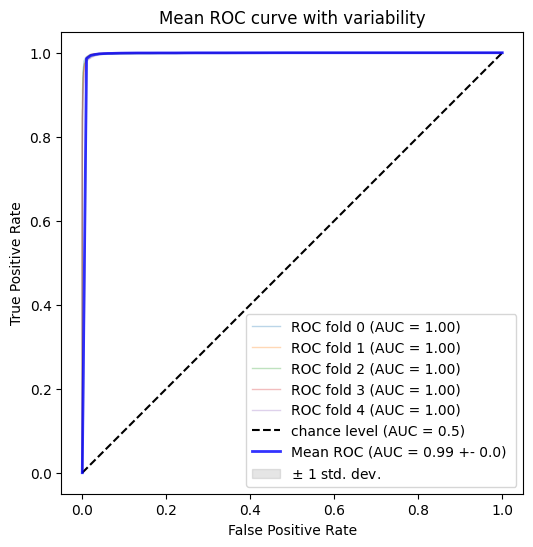

In [7]:

cross_validation.roc_cv_visualization(model=rf_model)

In [8]:
yhat = rf_model.predict(X_test)

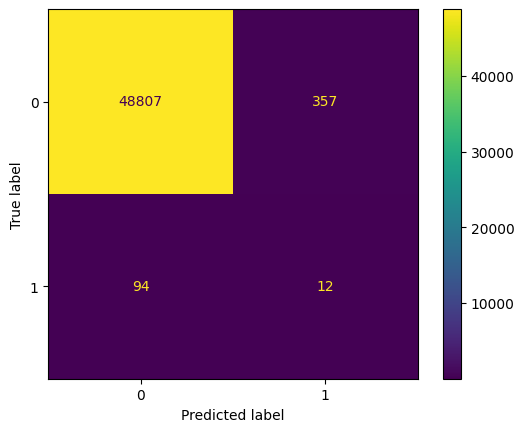

Classification Report for Unbalanced Series: 
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.11      1.00      0.34      0.12     49164
          1       0.03      0.11      0.99      0.05      0.34      0.10       106

avg / total       1.00      0.99      0.12      0.99      0.34      0.12     49270

Balanced Accuracy Score: 0.55
Matthews Correlation Coefficient: 0.05693634809335612
ROC AUC Score: 0.7911555740279358


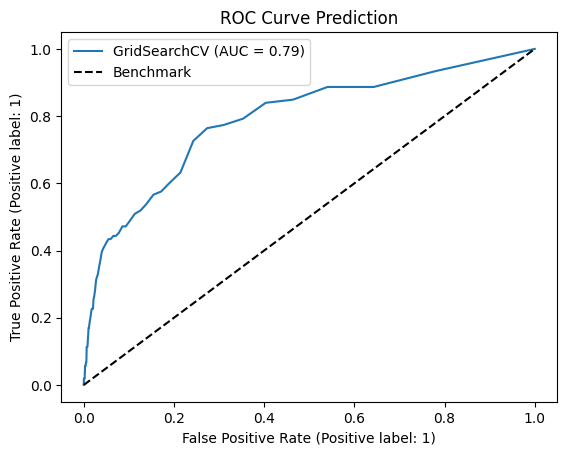

In [9]:
from utils.Metrics import calculate_metrics

yhat = best_model.predict(X_test)
calculate_metrics(X_test, y_test, yhat, model=best_model)